In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
data = pd.read_csv("../datasets/springData.csv")

# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%d/%m/%y %H:%M')

# Extract features from the datetime column
data['timestamp'] = data['datetime'].astype(int) // 10**9
print(data['datetime'][1])

2008-02-15 00:05:00


In [4]:
# Split the dataset into features (X) and target variable (y)
X = data[['timestamp']]
y = data['t2m']
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X.values, y)

LinearRegression()

In [9]:
# Predict the temperature for a given datetime
new_datetime = pd.to_datetime('30/04/2019 16:30', format='%d/%m/%Y %H:%M')
new_timestamp = new_datetime.timestamp()
new_temperature = model.predict([[new_timestamp]])

print('date:', pd.to_datetime('30/04/2019 0:30', format='%d/%m/%Y %H:%M') ,'Predicted temperature:', new_temperature)

date: 2019-04-30 00:30:00 Predicted temperature: [281.09426268]


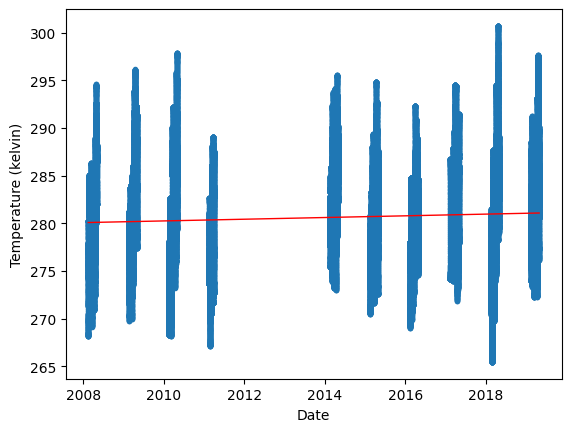

In [21]:
%matplotlib inline
plt.xlabel('Date')
plt.ylabel('Temperature (kelvin)')
plt.scatter(data['datetime'], data['t2m'], marker='.')
plt.plot(data['datetime'], model.predict(X.values), color='red', linewidth=1)
plt.savefig('../output-results/riseOfTemperature.png')
plt.show()

In [7]:
# coef = model.coef_
# intercept = model.intercept_
# coef, intercept, 2.82455672e-09*pd.to_datetime('30/04/45 0:30', format='%d/%m/%y %H:%M').timestamp() + intercept

(array([2.82455672e-09]), 276.6974396202268, 283.4117640132568)